# Final Result

In [4]:
labels = ['1', '2', '2', '4']
labels = [shittywok if ind < 3 else ' ' + shittywok for ind,shittywok in enumerate(labels)] 
labels

['1', '2', '2', ' 4']

In [1]:
import matplotlib
%matplotlib inline


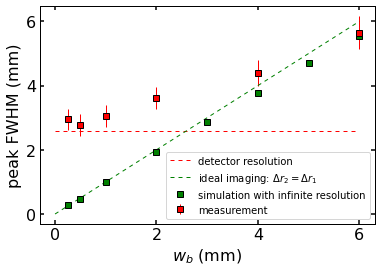

In [2]:
#Measurement
slitVals = [0.25,0.5,1,2,4,6]
peakWidth = [k*200/128 for k in [1.89,1.78,1.96,2.31,2.81,3.61]]

#Simulation
slit = [0.25,0.5,1,2,3,4,5,6]
slit = [0.25,0.5,1,2,3,4,5,6]#,8]# from centered detector+

simFWHMmm = [1.8674895248098835,1.86,1.867,1.896,2.739,3.879,4.677,5.710787119788222]
simFWHMmm = [1.96, 1.965, 1.965, 2.064, 2.82, 4.032, 4.630, 5.26]#, 7.31]# from centered detector
simFWHM1280pix = [0.2677558248091519, 0.47860184835021174, 0.9970242865612816, 1.9274601392843367, 2.851955278045833, 3.7832739610715223, 4.698685584628164, 5.55143671308741, 7.352331126947177]

peakWidthErr = [k*2.355*200/32 for k in [0.022,0.023,0.023,0.023,0.028,0.035]]
fig,ax = plt.subplots()
ax.set_xlabel(r'$w_b$ (mm)')
ax.set_ylabel('peak FWHM (mm)')


resolution_line, = ax.plot([0, 6], [2.6, 2.6], label='detector resolution', linestyle=' ', marker=' ')
resolution_line.set_dashes([4, 4])
line, = ax.plot(range(0,7),range(0,7),linestyle = '-',marker = '',label = 'ideal imaging: $\Delta r_2 = \Delta r_1$',color = 'green')
ax.errorbar(slitVals,peakWidth,peakWidthErr, label = 'measurement',color = 'red',linestyle = ' ', markeredgewidth=1)
#ax.plot(slit,simFWHMmm,label = 'Simulation with realistic detector',color = 'green',linestyle = ' ')
ax.plot(slit,simFWHM1280pix[:-1],label = 'simulation with infinite resolution',color = 'green', linestyle = ' ', markeredgewidth=1)
line.set_dashes((4,4))
ax.legend()
#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/presentation/slitsize.png', bbox_inches = 'tight', dpi=300)
fig.savefig('/home/cherb/LRZ Sync+Share/Doktorarbeit/Paper/NestedOptic/figures/slitsize.pdf', bbox_inches='tight')

# ss2 (0.00, -2.50) 0.50 x 5.00

(0.00, -2.50) 0.50 x 5.00


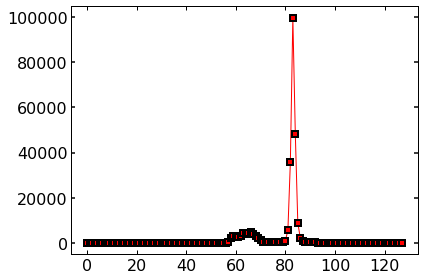

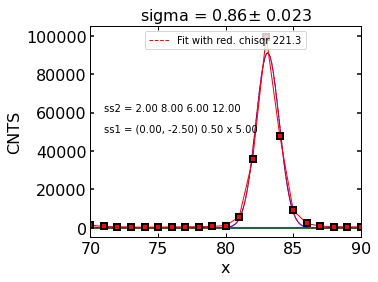

ValueError: too many values to unpack (expected 2)

In [2]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(6621),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(6621))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
print(meta['ss1_value'])
dat1.ax.set_xlim(70,90)
#dat1.ax.plot(range(500))
plt.show()
r1,r2 =dataEval.retFWHM(inty,xmin = 75,xmax = 100, plot = True)
print(abs(r1-r2),'nomSig',abs(r1-r2)/2.355)

[544170.0287552768, 959666.1153857687, 1129974.2417752414, 1175241.1630723467, 1186802.4637976924, 1170552.1900856856, 1217854.675838743, 1253845.7036798876, 1206383.336891142, 1187382.6986162448, 1093867.2344886416, 730158.5669629059, 289658.08064523176]
[1.1368224938422933, 0.9482218146455769, 0.9404026644255453, 0.9139492445584834, 0.9173090819997274, 0.9381192644875551, 0.8929906862846547, 0.8560709740741569, 0.895134522876416, 0.900546085175089, 0.9000969823489124, 0.9013860175609996, 0.931898872093123]


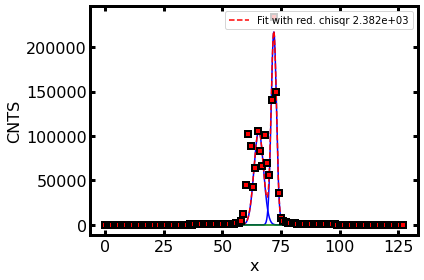

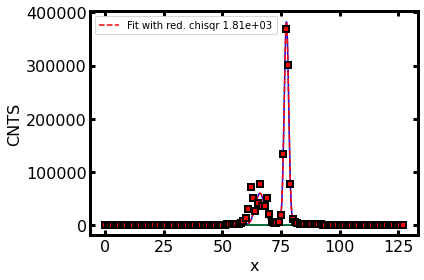

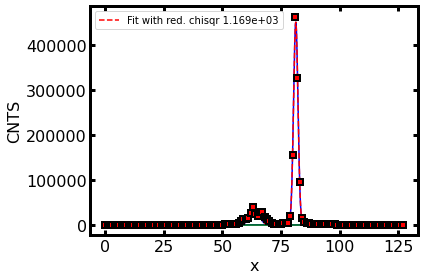

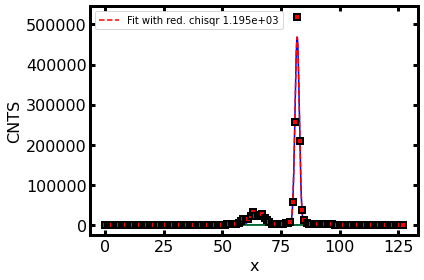

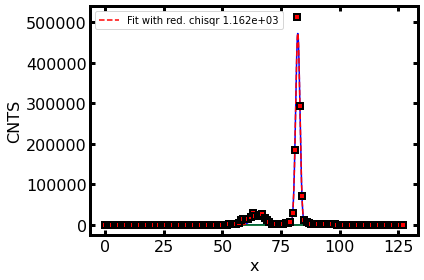

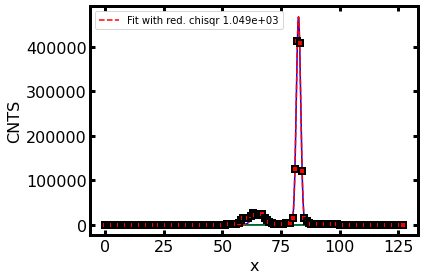

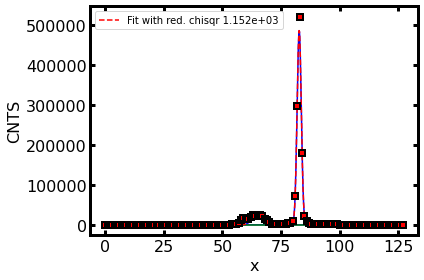

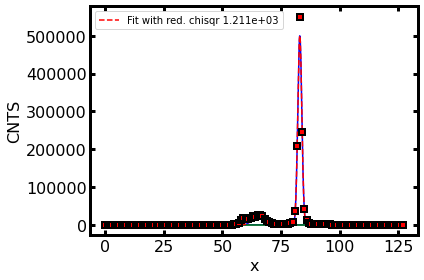

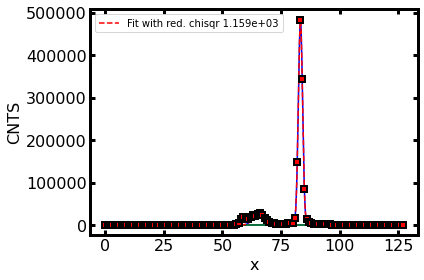

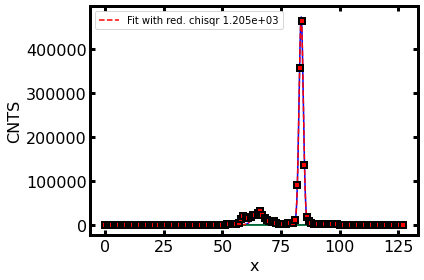

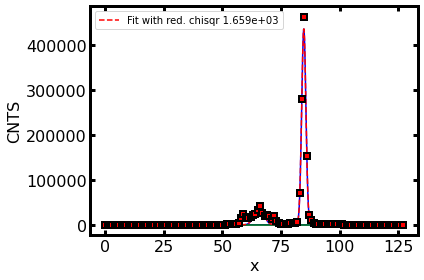

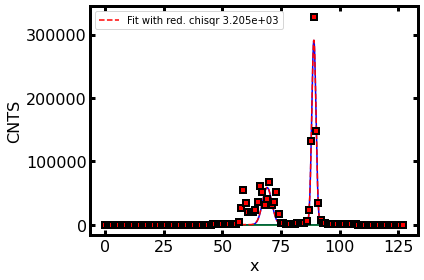

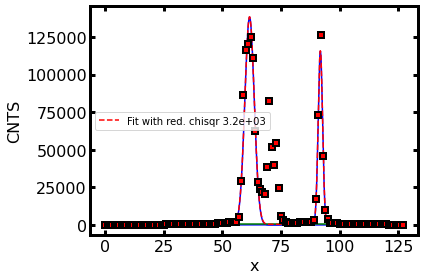

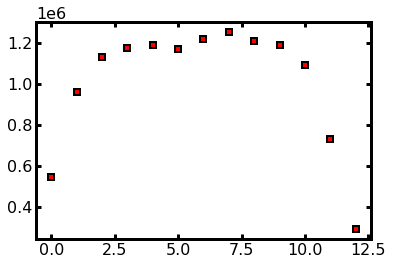

In [4]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
all_sigmas = []
all_amplitudes = []
all_centers = []
all_areas = []
all_amplitudesErr = []
for file in range(7165,7190,2):
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)

    #dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=True, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = res.params['g0_center'].stderr,res.params['g0_center'].stderr
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    #print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    #print(amplitudes)
    all_sigmas += [sigmas[i]]
    all_amplitudes += [amplitudes[i]]
    all_amplitudesErr +=[ ampErr[i]]
    all_areas += [areas[i]]
    all_centers += [centers[i]]
print(all_amplitudes)
fig,ax = plt.subplots(1)
print(all_sigmas)
ax.plot(all_amplitudes)


# ss1_val (0.00, -2.50) 0.25 x 5.00


(0.00, -2.50) 0.25 x 5.00


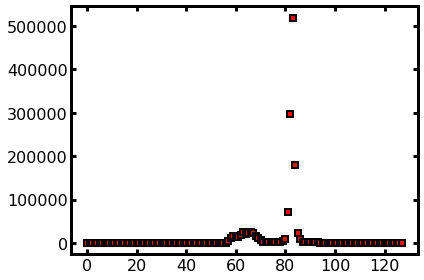

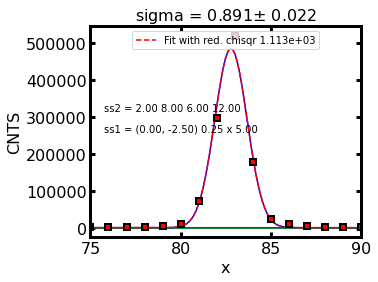

1.8939856772674375 nomSig 0.8042402026613322


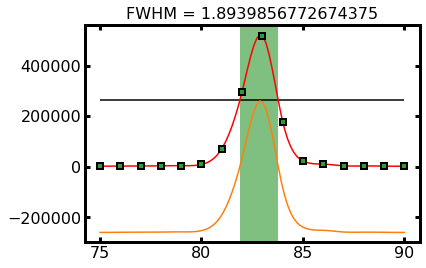

In [6]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7177),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7177))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
dat1.ax.set_xlim(75,90)
print(meta['ss1_value'])

#dat1.ax.plot(range(500))
plt.show()
r1,r2 =dataEval.retFWHM(inty,xmin = 75,xmax = 90, plot = True)
print(abs(r1-r2),'nomSig',abs(r1-r2)/2.355)


# Slitsize 1

Test peaks [72 61]
ffo
Test peaks [77 62]
ffo
Test peaks [81 63]
ffo
Test peaks [82 63]
ffo
Test peaks [82 63]
ffo
Test peaks [82 63]
ffo
Test peaks [83 66]
ffo
Test peaks [83 66]
ffo
Test peaks [83 66]
ffo
Test peaks [84 66]
ffo
Test peaks [85 66]
ffo
Test peaks [89 70]
ffo
Test peaks [92 62]
ffo
[551199.3050484436, 999222.5675589178, 1179250.001386316, 1225086.187829968, 1221231.319518225, 1234994.5314153298, 1261094.0496667628, 1291024.2089732054, 1256407.770394327, 1242750.0176436878, 1151647.8906826847, 770748.0454266644, 330095.3528683758]
[1.1724612972789796, 0.9655059737276296, 0.958745455886966, 0.9423700192049699, 0.9495288973646545, 0.9499043706999886, 0.9196941575930055, 0.8969356006690661, 0.9159397208877663, 0.9186064753219786, 0.9281167673576014, 0.9400426853829378, 0.9606088260376983]


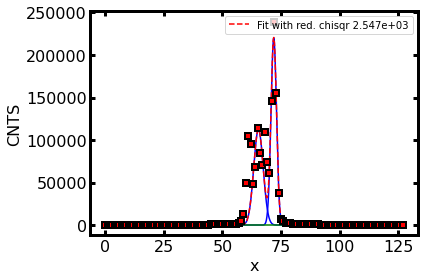

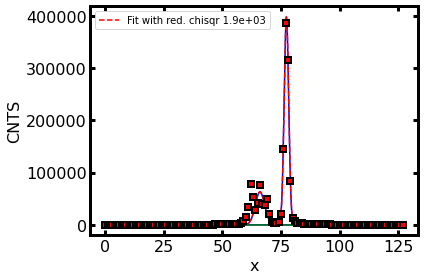

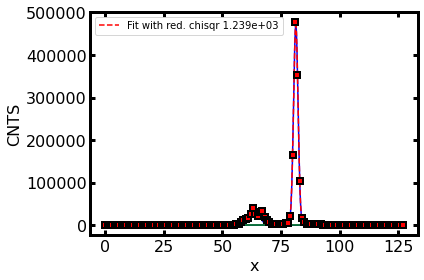

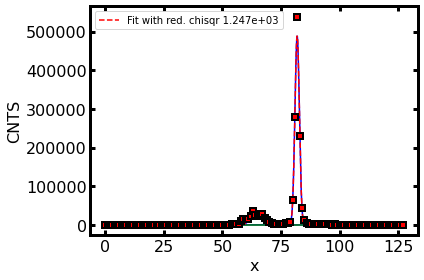

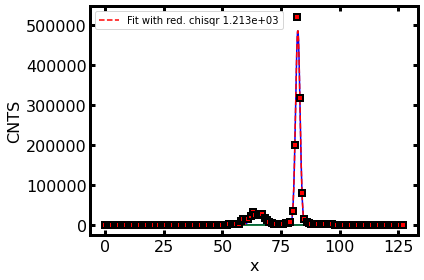

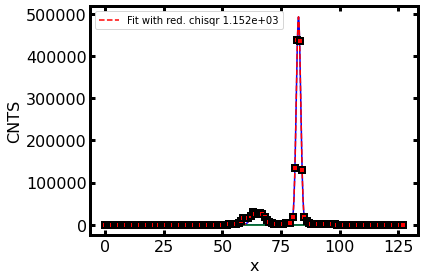

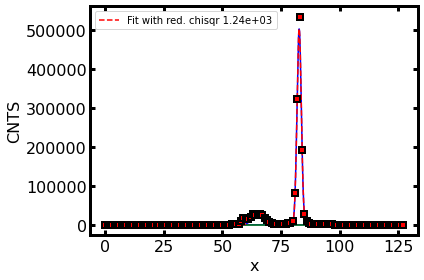

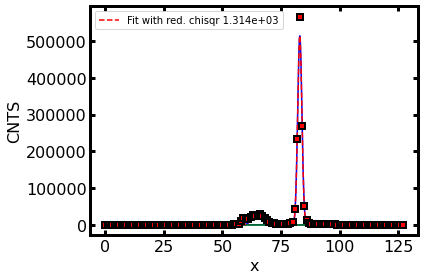

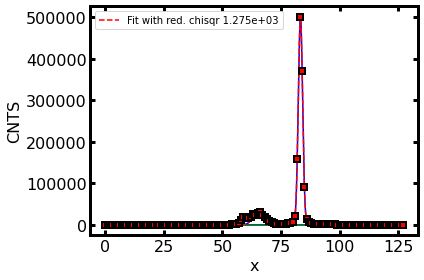

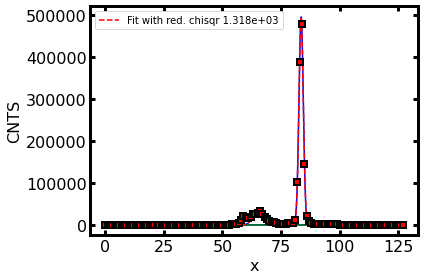

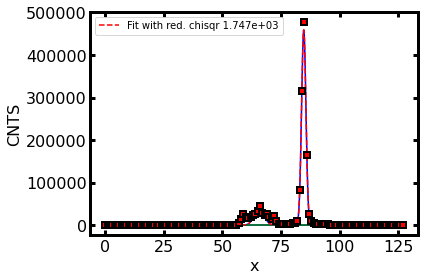

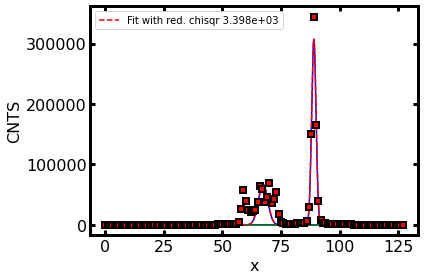

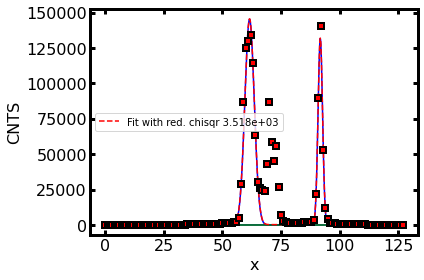

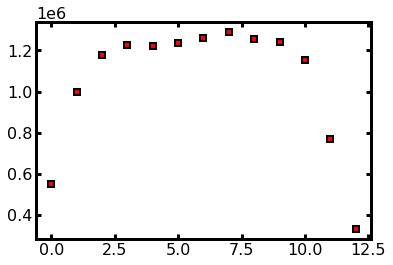

In [13]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
all_sigmas = []
all_amplitudes = []
all_centers = []
all_areas = []
all_amplitudesErr = []
for file in range(7191,7216,2):
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)

    #dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=True, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = res.params['g0_center'].stderr,res.params['g0_center'].stderr
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    #print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    #print(amplitudes)
    all_sigmas += [sigmas[i]]
    all_amplitudes += [amplitudes[i]]
    all_amplitudesErr +=[ ampErr[i]]
    all_areas += [areas[i]]
    all_centers += [centers[i]]
print(all_amplitudes)
fig,ax = plt.subplots(1)
print(all_sigmas)
ax.plot(all_amplitudes)


# (0.00, -2.50) 1.00 x 5.00

(0.00, -2.50) 1.00 x 5.00


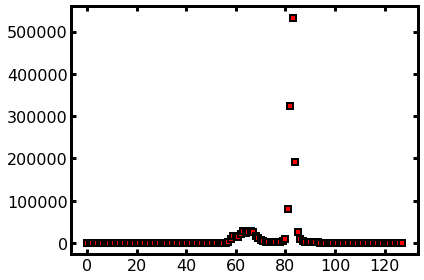

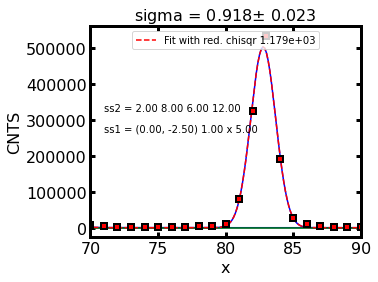

1.96850610133518 nomSig 0.8358836948344713


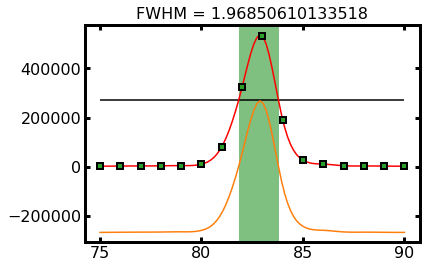

In [1]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7203),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7203))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
dat1.ax.set_xlim(70,90)
print(meta['ss1_value'])
#dat1.ax.plot(range(500))
plt.show()
r1,r2 =dataEval.retFWHM(inty,xmin = 75,xmax = 90, plot = True)
print(abs(r1-r2),'nomSig',abs(r1-r2)/2.355)

(0.00, -2.50) 2.00 x 5.00
[1.2747604592079536, 1.0179173219652804, 1.0138397901386451, 1.019994527112387, 1.0161301920870691, 0.997258829305455, 0.9892352385966589, 0.9885254797935238, 0.9755011471429595, 0.9687836801675226, 0.9945899894065118, 1.0310062344523234, 1.0255268109089144]


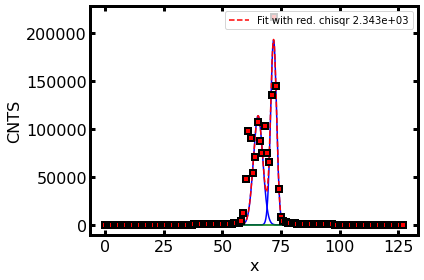

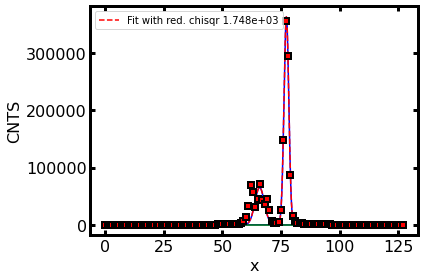

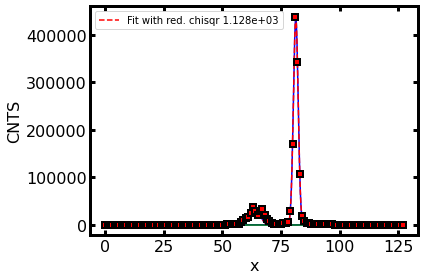

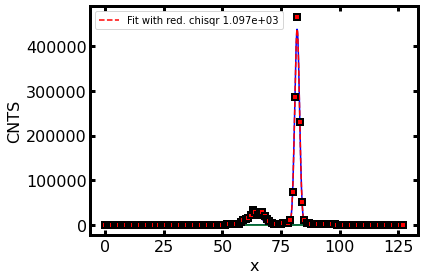

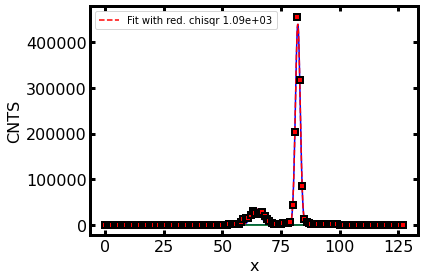

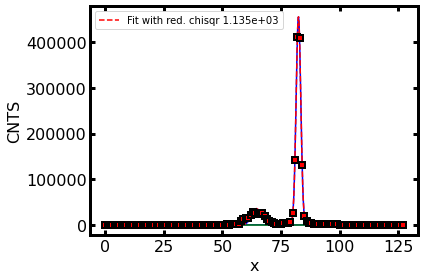

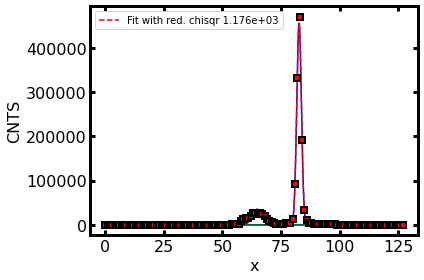

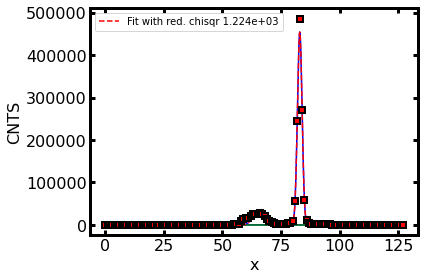

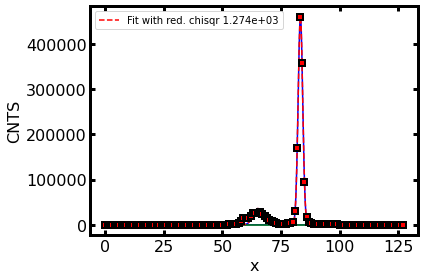

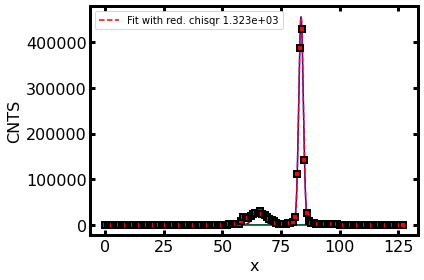

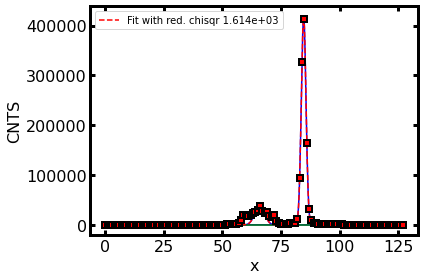

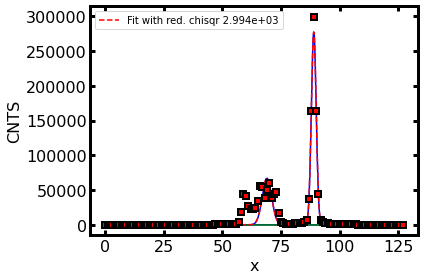

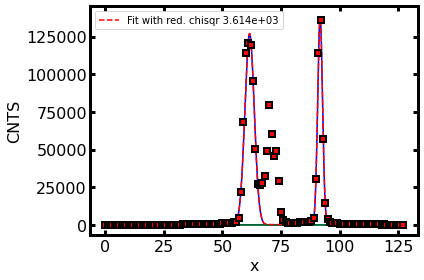

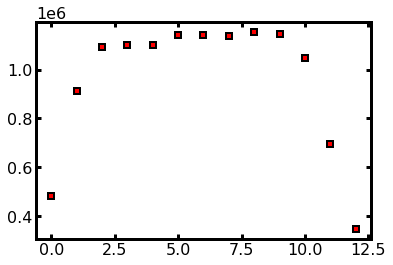

In [33]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
all_sigmas = []
all_amplitudes = []
all_centers = []
all_areas = []
all_amplitudesErr = []
for file in range(7217,7242,2):
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)

    #dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=True, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = res.params['g0_center'].stderr,res.params['g0_center'].stderr
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    #print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    #print(amplitudes)
    all_sigmas += [sigmas[i]]
    all_amplitudes += [amplitudes[i]]
    all_amplitudesErr +=[ ampErr[i]]
    all_areas += [areas[i]]
    all_centers += [centers[i]]
print(meta['ss1_value'])
fig,ax = plt.subplots(1)
print(all_sigmas)
ax.plot(all_amplitudes)


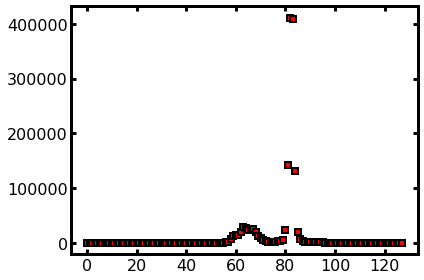

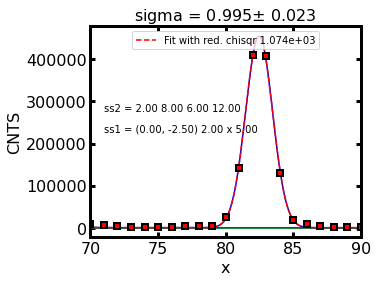

2.310401282416038 nomSig 0.9810621156756


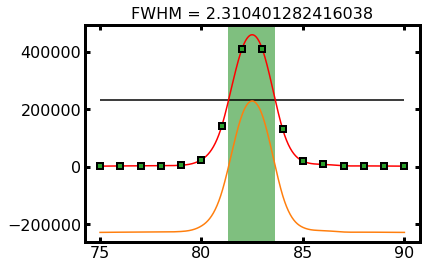

In [2]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7227),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7227))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
dat1.ax.set_xlim(70,90)
#dat1.ax.plot(range(500))
plt.show()
r1,r2 =dataEval.retFWHM(inty,xmin = 75,xmax = 90, plot = True,points = 1000)
print(abs(r1-r2),'nomSig',abs(r1-r2)/2.355)

(0.00, -2.50) 4.00 x 5.00
[1.9999964015075689, 1.2294142767390372, 1.2252964148814611, 1.2197910421110851, 1.2133955597877049, 1.2126956533368622, 1.2055717481760548, 1.1940095742556538, 1.1904355027704219, 1.1892794900052104, 1.2004610041600052, 1.216027361900577, 1.2319616028960398]


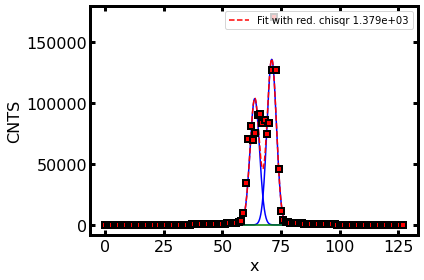

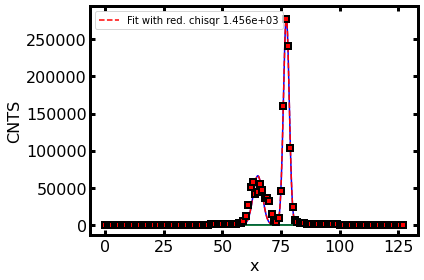

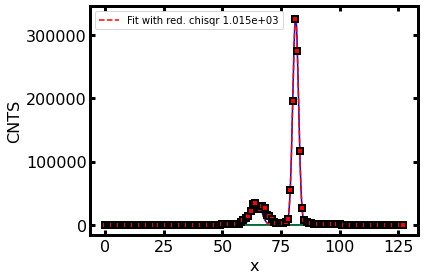

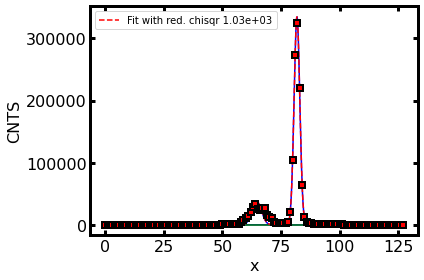

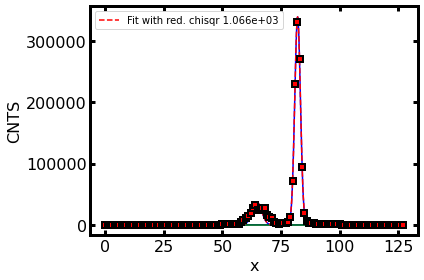

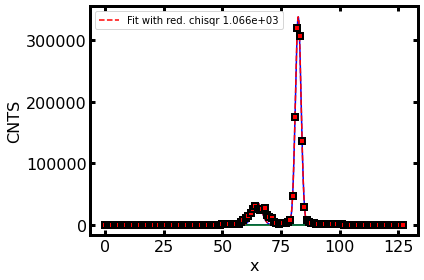

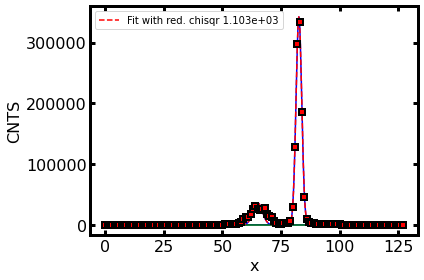

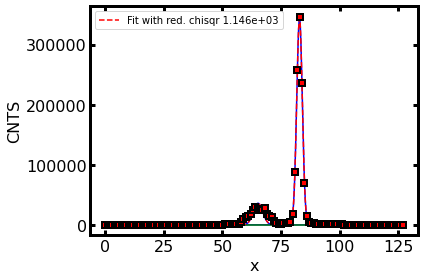

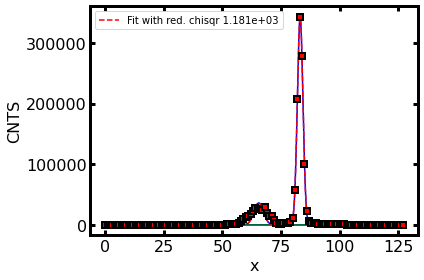

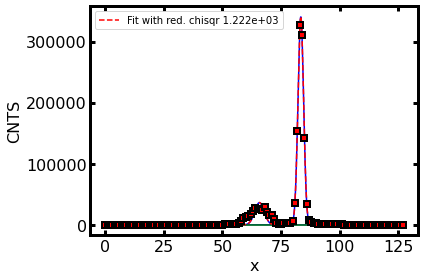

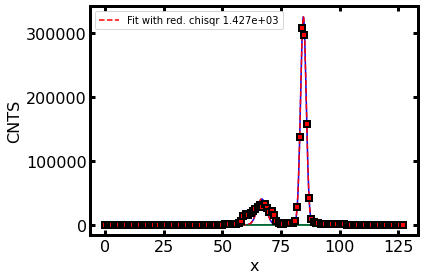

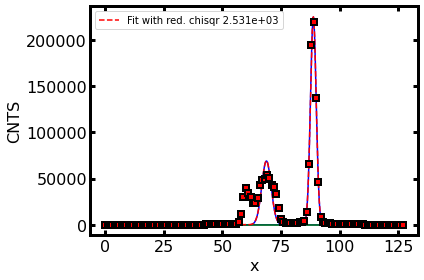

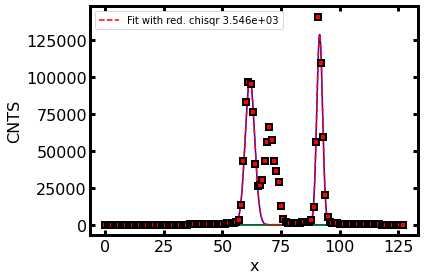

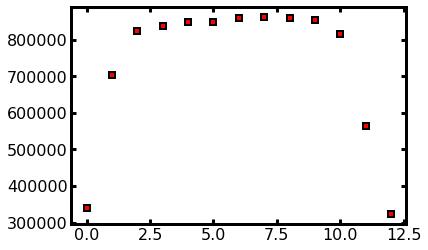

In [8]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
all_sigmas = []
all_amplitudes = []
all_centers = []
all_areas = []
all_amplitudesErr = []
for file in range(7243,7269,2):
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)

    #dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=True, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = res.params['g0_center'].stderr,res.params['g0_center'].stderr
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    #print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    #print(amplitudes)
    all_sigmas += [sigmas[i]]
    all_amplitudes += [amplitudes[i]]
    all_amplitudesErr +=[ ampErr[i]]
    all_areas += [areas[i]]
    all_centers += [centers[i]]
print(meta['ss1_value'])
fig,ax = plt.subplots(1)
print(all_sigmas)
ax.plot(all_amplitudes)


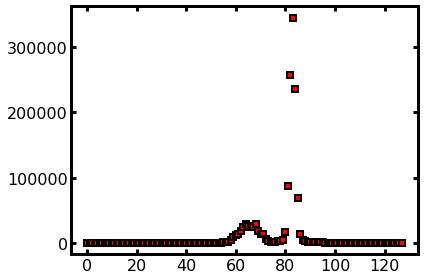

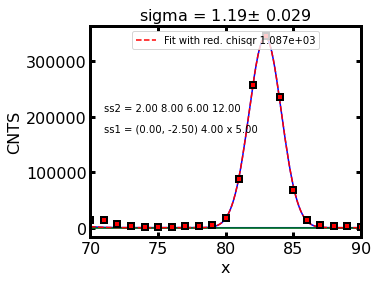

2.81133594918947 nomSig 1.1937732268320467


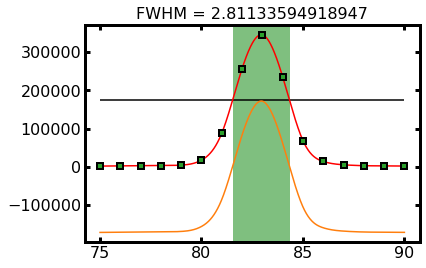

In [9]:
import nicosload
import importlib
import dataEval
from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7257),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7257))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
dat1.ax.set_xlim(70,90)
#dat1.ax.plot(range(500))
plt.show()
r1,r2 =dataEval.retFWHM(inty,xmin = 75,xmax = 90, plot = True,points = 1000)
print(abs(r1-r2),'nomSig',abs(r1-r2)/2.355)

(0.00, -2.50) 6.00 x 5.00
[1.9999999983332057, 1.4784234676871475, 1.4552539451603341, 1.4492438247962522, 1.4425749103441348, 1.4366850057157556, 1.4276991543847313, 1.4258575285574357, 1.4187464135934755, 1.4135916803353368, 1.4119033156125034, 1.4460725595437138, 1.4535909549244985]


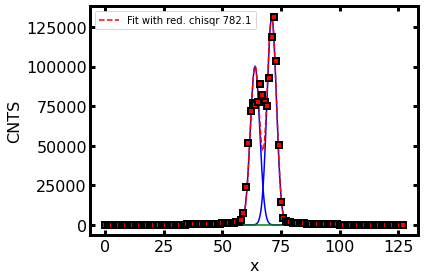

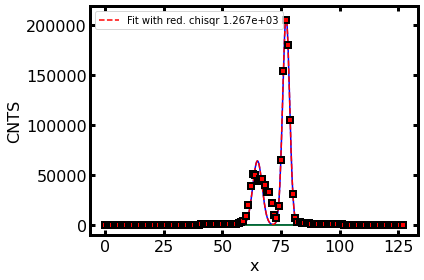

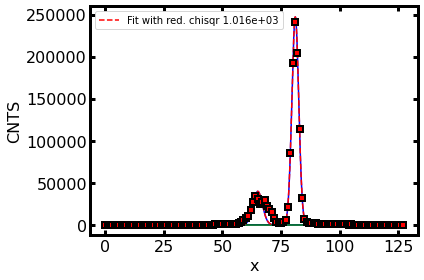

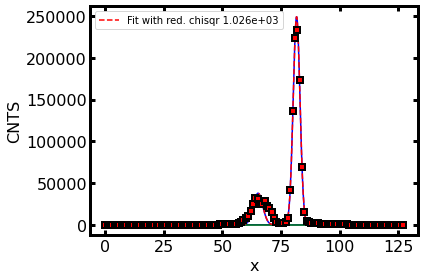

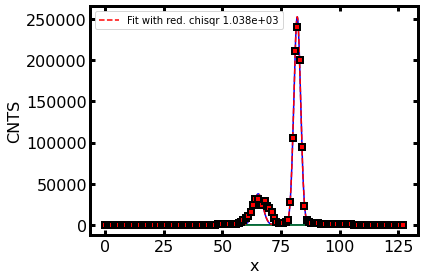

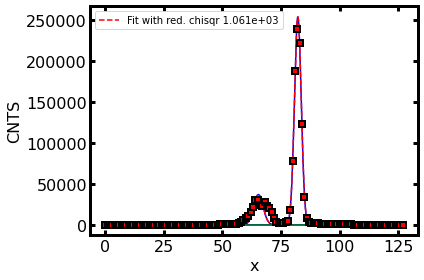

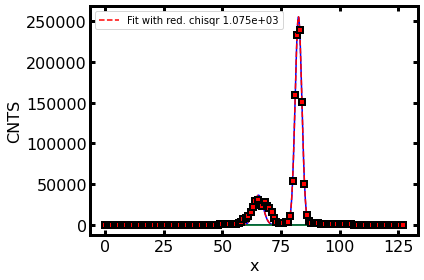

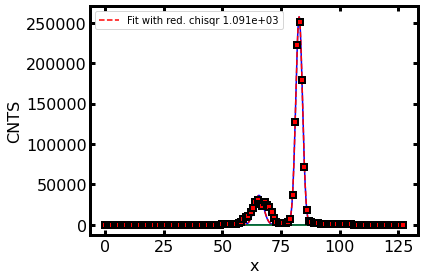

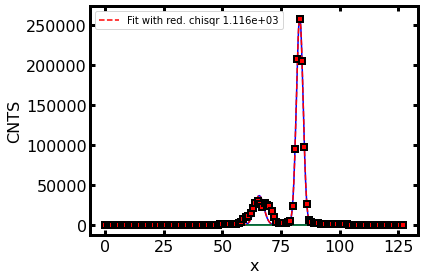

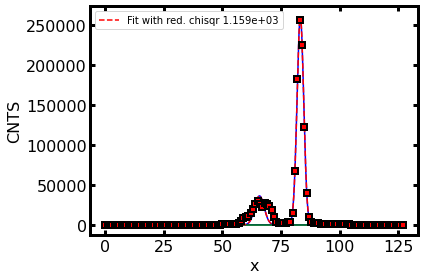

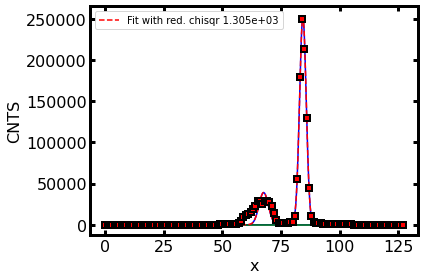

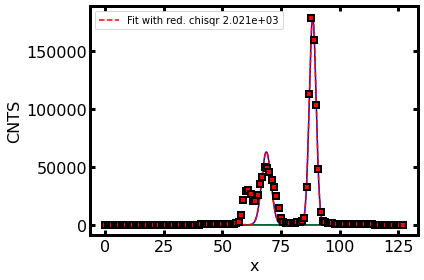

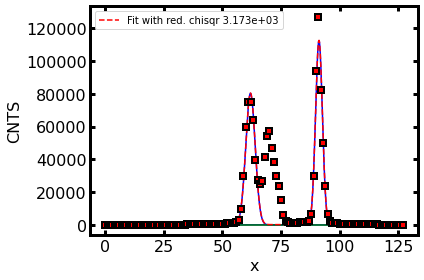

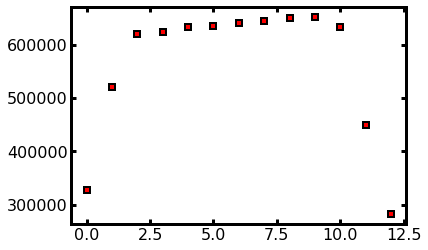

In [34]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
all_sigmas = []
all_amplitudes = []
all_centers = []
all_areas = []
all_amplitudesErr = []
for file in range(7269,7294,2):
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    xtent,ytent = data.shape
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)

    #dat1.fig,dat1.ax = plt.subplots(1,1) 
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=True, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value,]
    #some stuff for error calc
    cenErr = res.params['g0_center'].stderr,res.params['g0_center'].stderr
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    #print(file,'dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    #print(amplitudes)
    all_sigmas += [sigmas[i]]
    all_amplitudes += [amplitudes[i]]
    all_amplitudesErr +=[ ampErr[i]]
    all_areas += [areas[i]]
    all_centers += [centers[i]]
print(meta['ss1_value'])
fig,ax = plt.subplots(1)
print(all_sigmas)
ax.plot(all_amplitudes)


In [ ]:
import nicosload
import importlib
import dataEval
%matplotlib auto

from ill_datafile.ill_datafile import Datafile
importlib.reload(nicosload)
roi = (0,128,47,77)
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7279),roi)
_,meta = nicosload.read_pad_file('data/pad_files/0032{}.pad'.format(7279))
dat1 = Datafile('kra')
dat1.fig,dat1.ax = plt.subplots(1)
dat1.ax.set_title('ss1={} ss2={}'.format(meta['ss1_value'],meta['ss2_value']))
res = dat1.fit_gauss([k for k in range(128)],inty,inty**0.5,xlabel = 'pix',peaks = 2,vlines = False)
dat1.ax.set_xlabel('x')
dat1.ax.set_title(r'sigma = {:.3}$\pm$ {:.2}'.format(res.params['g0_sigma'].value,res.params['g0_sigma'].stderr))
dat1.ax.text(0.05,0.5,'ss1 = '+meta['ss1_value'],transform=dat1.ax.transAxes)
dat1.ax.text(0.05,0.6,'ss2 = '+meta['ss2_value'],transform=dat1.ax.transAxes)
dat1.ax.legend(loc = 'upper center')
print(meta['ss1_value'])
#dat1.ax.plot(range(500))
inty = dataEval.plotInt('data/pad_files/0032{}.pad'.format(7279),roi)
#inty += 100000
dataEval.retFWHM(inty,xmin = 75,xmax = 90,plot = True)
dat1.ax.set_xlim(75,90)


plt.show()


# Plotting peak sigma against slitsize

In [3]:
def retHalfAreaWidth(y,x=None,xmin = None,xmax = None, points = 100,plot = False):
    '''
    returns the Width after which half of the peak area is reached of a given peak
    Parameters:
    y: data points
    x: x values of data points, defaults to integers
    xmin: minimum xvalue of peak
    xmax: maximum xvalue of peak
    points: number of points in spline
    
    '''
    from scipy.interpolate import UnivariateSpline
    if not x:
        x = np.array([k for k in range(len(y))])
    if xmin:
        xminInd, = np.where((x-xmin) == (min(abs(x-xmin))))[0]
    else: xminInd,xmin = 0,x[0]
    if xmax:
        xmaxInd, = np.where((x-xmax) == (min(abs(x-xmax))))[0]
    else: xmaxInd,xmax = len(y),x[-1]
    if xmin or xmax:
        print('minmax',xminInd,xmaxInd)
        x = x[xminInd:xmaxInd]
        y = y[xminInd:xmaxInd]
    xs = np.linspace(x[0],x[-1],points)
    spline = UnivariateSpline(x,y,s = 0)
    #search for the max as begin fr integration
    maxInd = np.argmax(spline(xs))
    print(maxInd)
    splineInt = UnivariateSpline(xs[maxInd:],spline(xs[maxInd:])).antiderivative()
    #find the half value
    halfAreaInd = np.argmin(np.abs(splineInt(xs[maxInd:])-np.max(splineInt(xs[maxInd:]))/2))
    print(halfAreaInd)
    if plot:
        fig,ax = plt.subplots()
        ax.plot(xs[maxInd:],splineInt(xs)[maxInd:],linestyle = '-',marker = '')
        ax.plot(xs,spline(xs),linestyle = '-',marker = '')
        ax.vlines(xs[halfAreaInd+maxInd],0,600000)
        

In [3]:
%matplotlib auto
retHalfAreaWidth(inty,xmin = 75,xmax = 100, plot = True,points = 1000)

Using matplotlib backend: Qt5Agg


NameError: name 'inty' is not defined

In [9]:
from numpy import cos,sin,pi
d = 2*0.015
gangle = 1
print(gangle*pi/180)
s = d/sin(gangle*pi/180)
print(s)

0.017453292519943295
1.7189606549565055


In [65]:
import numpy as np
def prob(n, i):
    return (n-i+1)/n
def var(n):
    var = 0
    for k in range(1,n+1):
        pi = prob(n, k)
        var += (1-pi)/pi**2
    #print('v',var)
    return var

def easyvar(n):
    return np.pi**2*n**2/6

def E(n):
    #print([1/i for i in range(1,n+1)])
    sums = sum([1/i for i in range(1,n+1)])
    return n*sums
def easy_E(n):
    return n*np.log(n) + 0.5772156649*n +1/2

def expected(n):
    return 1/2 *(E(n)+var(n)+E(n)**2)/n
def simple_expected(n):
    return 1/2 * (easyvar(n)+E(n)**2)/n


In [68]:
print(simple_expected(10000), expected(100000000))

487210.8299183 18128250110.416004


In [40]:
12019/720

16.693055555555556

In [36]:
var(2)

v 2.0
[1.0, 0.5]


11.0